In [1]:
#Import Labraries
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#Load Dataset
# Load only required columns (Big Data best practice)
selected_columns = [
    'age',
    'gender',
    'country',
    'employment_status',
    'income_level',

    'daily_active_minutes_instagram',
    'sessions_per_day',
    'average_session_length_minutes',
    'time_on_feed_per_day',
    'time_on_reels_per_day',

    'likes_given_per_day',
    'comments_written_per_day',
    'posts_created_per_week',
    'reels_watched_per_day',
    'stories_viewed_per_day',
    'user_engagement_score',

    'sleep_hours_per_night',
    'exercise_hours_per_week',
    'perceived_stress_score',
    'self_reported_happiness'
]

df = dd.read_csv(
    'instagram_usage_lifestyle.csv',
    usecols=selected_columns
)

df.head()


,age,gender,country,income_level,employment_status,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,daily_active_minutes_instagram,sessions_per_day,posts_created_per_week,reels_watched_per_day,stories_viewed_per_day,likes_given_per_day,comments_written_per_day,time_on_feed_per_day,time_on_reels_per_day,average_session_length_minutes,user_engagement_score
0,51,Female,India,High,Retired,7.2,7.7,3,8,5.0,1,3,42,28,28,5,2,2,5.0,7.83
1,64,Female,United Kingdom,Middle,Full-time employed,10.9,8.6,1,1,74.0,5,3,78,54,68,15,31,19,14.8,1.43
2,41,Female,Canada,Middle,Student,5.0,6.7,4,10,5.0,1,7,29,26,25,6,3,1,5.0,9.67
3,27,Non-binary,South Korea,Middle,Unemployed,10.6,6.5,18,1,233.0,9,5,241,109,132,36,108,64,25.9,0.94
4,55,Male,India,Upper-middle,Full-time employed,7.7,6.8,19,1,184.0,14,5,146,113,103,36,78,55,13.1,1.03


In [19]:
#Dataset Overviwe
# Column names
df.columns

# Number of records
df.shape[0].compute()

# Data types
df.dtypes

age                                         int64
gender                            string[pyarrow]
country                           string[pyarrow]
income_level                      string[pyarrow]
employment_status                 string[pyarrow]
exercise_hours_per_week                   float64
sleep_hours_per_night                     float64
perceived_stress_score                      int64
self_reported_happiness                     int64
daily_active_minutes_instagram            float64
sessions_per_day                            int64
posts_created_per_week                      int64
reels_watched_per_day                       int64
stories_viewed_per_day                      int64
likes_given_per_day                         int64
comments_written_per_day                    int64
time_on_feed_per_day                        int64
time_on_reels_per_day                       int64
average_session_length_minutes            float64
user_engagement_score                     float64


In [20]:
#Data Cleaning
# Check missing values
df.isnull().sum().compute()

# Drop rows with missing values
df = df.dropna()

# Confirm cleaning
df.isnull().sum().compute()


age                               0
gender                            0
country                           0
income_level                      0
employment_status                 0
exercise_hours_per_week           0
sleep_hours_per_night             0
perceived_stress_score            0
self_reported_happiness           0
daily_active_minutes_instagram    0
sessions_per_day                  0
posts_created_per_week            0
reels_watched_per_day             0
stories_viewed_per_day            0
likes_given_per_day               0
comments_written_per_day          0
time_on_feed_per_day              0
time_on_reels_per_day             0
average_session_length_minutes    0
user_engagement_score             0
dtype: int64

In [21]:
#Insight 1:Average Daily Instagram Usage
avg_usage = df['daily_active_minutes_instagram'].mean().compute()
avg_usage


np.float64(188.22979192400524)

In [22]:
#Insight 2:Instagram Usage by Gender
gender_usage = df.groupby('gender')['daily_active_minutes_instagram'].mean().compute()
gender_usage


gender
Female               188.225116
Male                 188.277833
Non-binary           188.089705
Prefer not to say    186.587478
Name: daily_active_minutes_instagram, dtype: float64

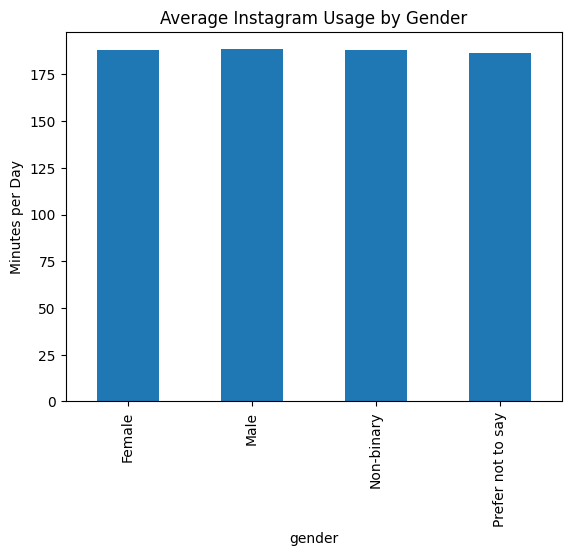

In [23]:
gender_usage.plot(kind='bar', title='Average Instagram Usage by Gender')
plt.ylabel("Minutes per Day")
plt.show()


In [24]:
#Insight 3:Age vs Reels Consumption
age_reels = df.groupby('age')['reels_watched_per_day'].mean().compute()
age_reels.head()


age
13    244.399566
14    243.554641
15    243.050371
16    242.366122
17    241.909379
Name: reels_watched_per_day, dtype: float64

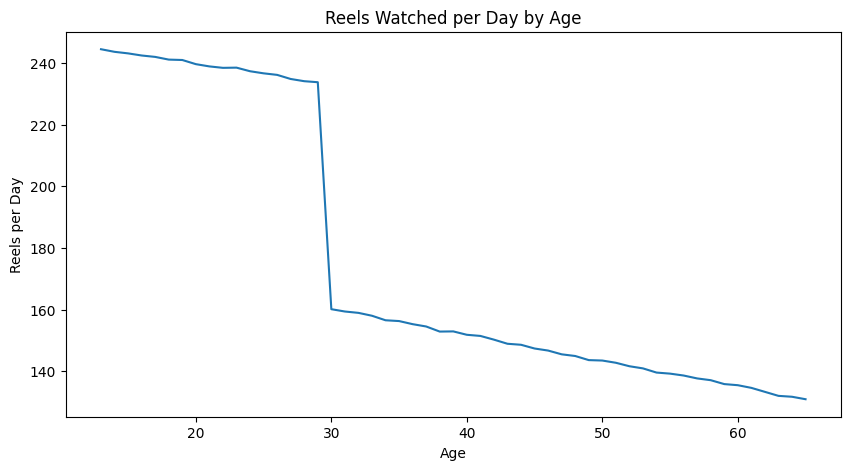

In [25]:
age_reels.plot(figsize=(10,5))
plt.title("Reels Watched per Day by Age")
plt.xlabel("Age")
plt.ylabel("Reels per Day")
plt.show()


In [26]:
#Insight 4:Instagram Usage vs Sleep Hours
sleep_usage = df.groupby('sleep_hours_per_night')['daily_active_minutes_instagram'].mean().compute()
sleep_usage


sleep_hours_per_night
3.0     201.000000
3.1     210.724490
3.2     181.046980
3.3     177.550562
3.4     199.151943
           ...    
9.6     186.489337
9.7     187.310849
9.8     189.841961
9.9     184.220153
10.0    187.364188
Name: daily_active_minutes_instagram, Length: 71, dtype: float64

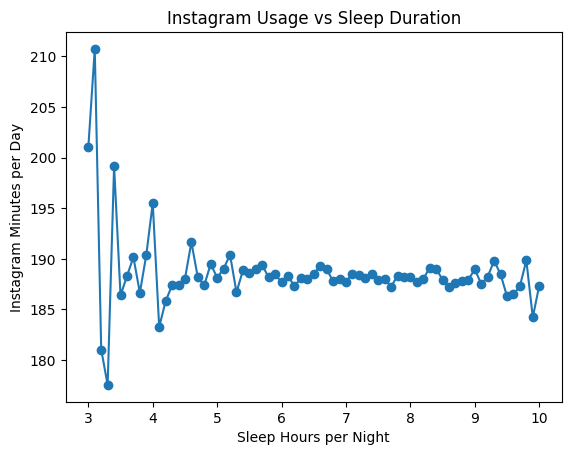

In [27]:
sleep_usage.plot(marker='o')
plt.title("Instagram Usage vs Sleep Duration")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Instagram Minutes per Day")
plt.show()


In [28]:
#Insight 5:Stress vs Engagement
stress_engagement = df.groupby('perceived_stress_score')['user_engagement_score'].mean().compute()
stress_engagement


perceived_stress_score
0     4.524716
1     4.190958
2     3.840091
3     3.555908
4     3.242018
5     2.937561
6     2.660745
7     2.403232
8     2.180594
9     1.998529
10    1.844398
11    1.686353
12    1.582448
13    1.466049
14    1.383834
15    1.316556
16    1.260084
17    1.221737
18    1.177110
19    1.154124
20    1.128861
21    1.111105
22    1.096092
23    1.084843
24    1.072118
25    1.063657
26    1.056522
27    1.048235
28    1.041266
29    1.034697
30    1.028652
31    1.023517
32    1.017561
33    1.012503
34    1.006741
35    1.001959
36    0.998030
37    0.991982
38    0.987582
39    0.983229
40    0.978969
Name: user_engagement_score, dtype: float64

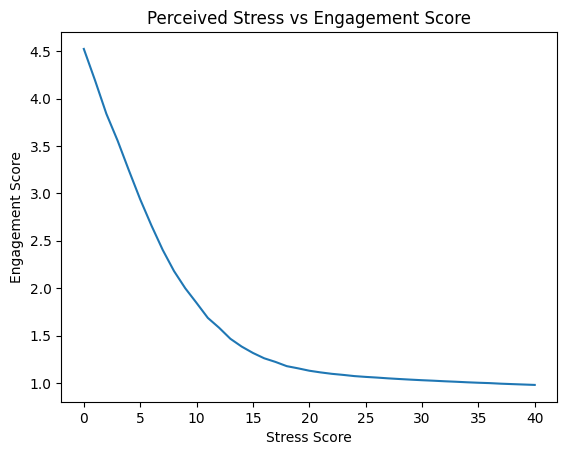

In [29]:
stress_engagement.plot(kind='line')
plt.title("Perceived Stress vs Engagement Score")
plt.xlabel("Stress Score")
plt.ylabel("Engagement Score")
plt.show()


In [30]:
#Insight 6:Employment status vs Instagram Usage
employment_usage = df.groupby('employment_status')['daily_active_minutes_instagram'].mean().compute()
employment_usage


employment_status
Freelancer            188.166173
Full-time employed    188.156383
Part-time             189.050467
Retired               187.447097
Student               188.210388
Unemployed            188.258105
Name: daily_active_minutes_instagram, dtype: float64

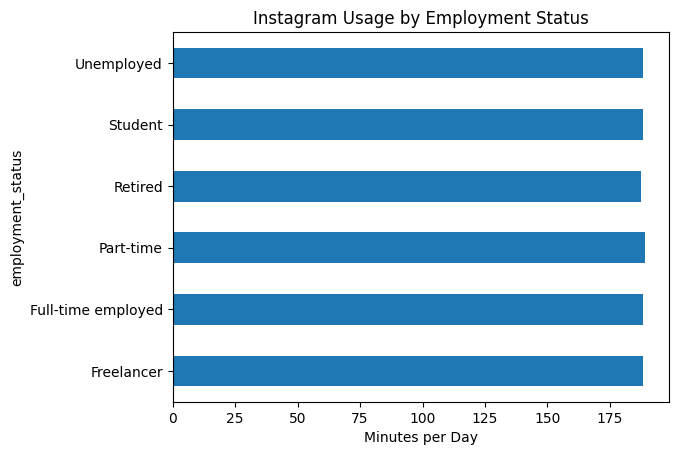

In [31]:
employment_usage.plot(kind='barh')
plt.title("Instagram Usage by Employment Status")
plt.xlabel("Minutes per Day")
plt.show()


In [32]:
#Demonstrating Scalability
# Partition-wise processing
df.map_partitions(len).compute()


0    258591
0    258247
0    258265
0    258147
0    257339
0    257307
dtype: int64